# Real State Querétaro EDA
## 1. Data Health Check

In [32]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_path = Path("../data")
raw_data_path = data_path / "raw"

df = pd.read_csv(raw_data_path / "real_estate_queretaro_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12221 entries, 0 to 12220
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            12221 non-null  object 
 1   price_numeric    12206 non-null  float64
 2   bedrooms         12124 non-null  float64
 3   bathrooms        12066 non-null  float64
 4   parking_spots    11617 non-null  float64
 5   m2_constructed   12033 non-null  float64
 6   m2_terrain       11916 non-null  float64
 7   latitude         1 non-null      float64
 8   longitude        1 non-null      float64
 9   location_text    12221 non-null  object 
 10  url              12221 non-null  object 
 11  extraction_date  12221 non-null  object 
 12  source_page      12221 non-null  int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 1.2+ MB


In [33]:
total_rows = df.shape[0]
unique_urls = df['url'].nunique()

print(f'Number of unique URLs: {unique_urls}')
print(f'Percentage of duplicates: {(total_rows - unique_urls)/total_rows * 100:.2f}%')

Number of unique URLs: 12104
Percentage of duplicates: 0.96%


In [34]:
try:
    df = df.drop(columns=['longitude', 'latitude', 'source_page', 'extraction_date'])
except KeyError:
    print("Columns not found. Skipping...")

df = df.convert_dtypes(
        infer_objects=True,
        convert_string=True,
        convert_integer=True,
        convert_boolean=False,
        convert_floating=False)

print('\n')
df.dtypes

title             string[python]
price_numeric              Int64
bedrooms                   Int64
bathrooms                  Int64
parking_spots              Int64
m2_constructed             Int64
m2_terrain                 Int64
location_text     string[python]
url               string[python]
dtype: object

In [35]:
df

,title,price_numeric,bedrooms,bathrooms,parking_spots,m2_constructed,m2_terrain,location_text,url
0,"Desarrollo inmobilario en venta en Meseta, Fra...",2569000,3,3,2,133,115,"Meseta, Fraccionamiento Sonterra, Querétaro",https://www.vivanuncios.com.mx/d-desarrollo-ho...
1,Casas en venta - 1000m2 - 5 recamaras - Juriqu...,27500000,5,5,6,1000,1000,"Boulevard Villas del Meson, Fraccionamiento Vi...",https://www.vivanuncios.com.mx/a-venta-casa/fr...
2,Casas en venta - 180m2 - 4 recamaras - Altozan...,6750000,4,4,2,223,180,"Altozano, Altozano el Nuevo Querétaro, Querétaro",https://www.vivanuncios.com.mx/a-venta-casa/al...
3,Casas en venta - 135m2 - 0 recamaras - Residen...,3200000,3,2,<NA>,182,135,"Anillo Vial Fray Junipero Queretaro, Residenci...",https://www.vivanuncios.com.mx/a-venta-casa/re...
4,Casas en venta - 161m2 - 3 recamaras - Cañadas...,3700000,3,4,2,220,161,"Cañadas del Arroyo, Cañadas del Arroyo, Correg...",https://www.vivanuncios.com.mx/a-venta-casa/ca...
...,...,...,...,...,...,...,...,...,...
12216,Casas en venta - 126m2 - 4 recamaras - Zákia -...,3499000,4,2,2,151,126,"Casa en Venta Zakia, Sala Tv, 4ta Recámara en ...",https://www.vivanuncios.com.mx/a-venta-casa/za...
12217,Casas en venta - 128m2 - 3 recamaras - El Marq...,2930000,3,2,2,152,128,"Casa en Venta Zen Life, 10 min Arcos, Salida C...",https://www.vivanuncios.com.mx/a-venta-casa/el...
12218,Casas en venta - 125m2 - 3 recamaras - Fraccio...,2320000,3,2,1,125,125,"Casa en Venta Meseta, Frente a Sonterra, Excel...",https://www.vivanuncios.com.mx/a-venta-casa/fr...
12219,Casas en venta - 151m2 - 3 recamaras - Jurica ...,6190000,3,2,2,195,151,"Casa en Venta Frente a Jurica, Family Room, Ro...",https://www.vivanuncios.com.mx/a-venta-casa/ju...


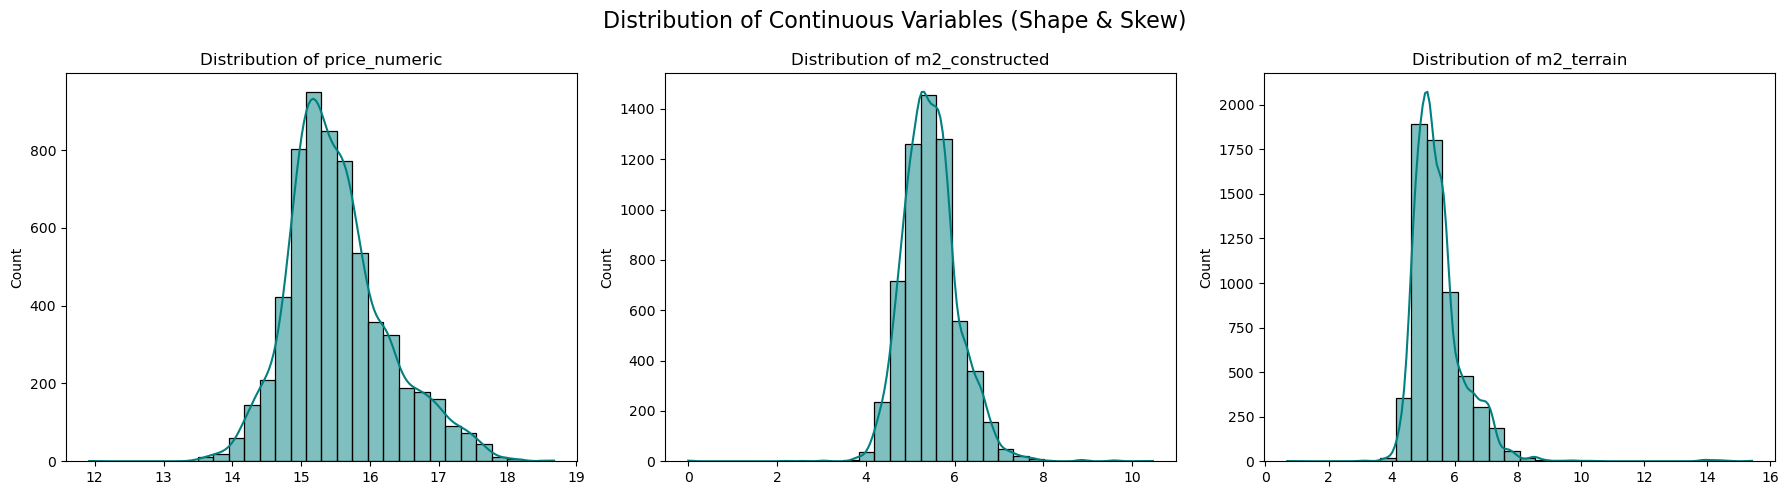

In [31]:
# Define continuous variables
continuous_vars = ['price_numeric', 'm2_constructed', 'm2_terrain']

# Setup the figure (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Continuous Variables (Shape & Skew)', fontsize=16)

for i, col in enumerate(continuous_vars):
    # Use histplot with Kernel Density Estimate (KDE)
    sns.histplot(np.log1p(df[col]), kde=True, ax=axes[i], color='teal', bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

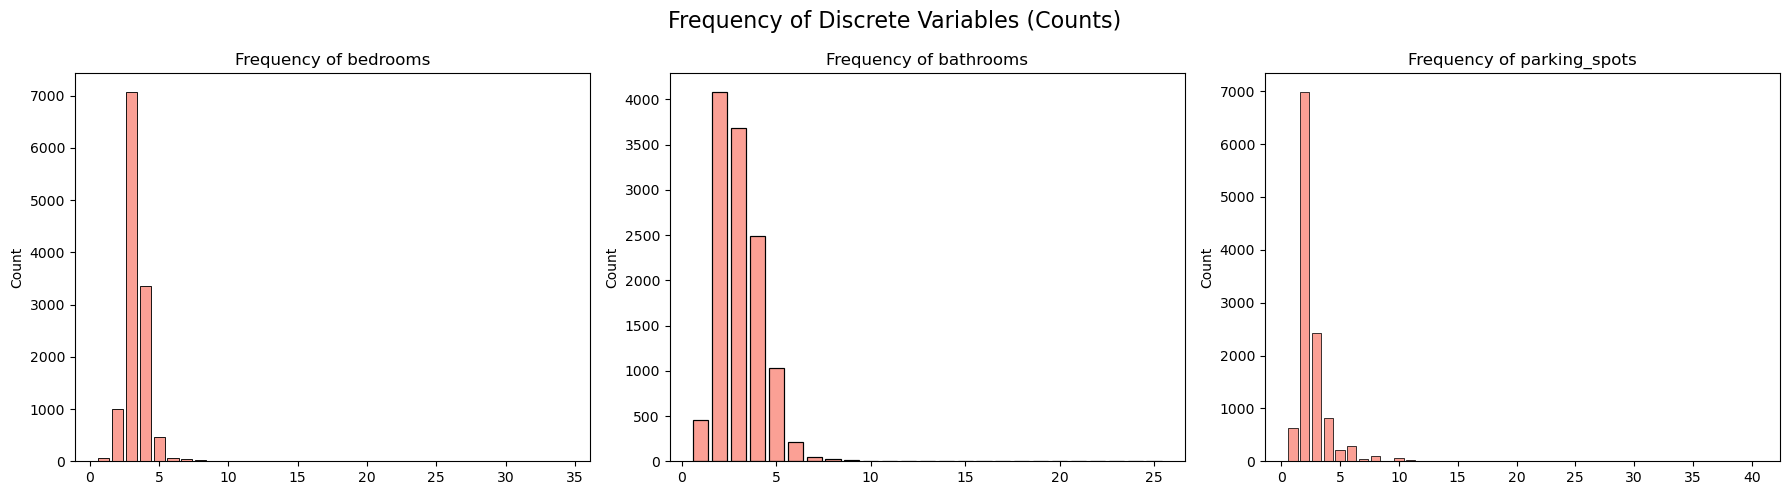

In [36]:
# Define discrete variables
discrete_vars = ['bedrooms', 'bathrooms', 'parking_spots']

# Setup the figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Frequency of Discrete Variables (Counts)', fontsize=16)

for i, col in enumerate(discrete_vars):
    # discrete=True ensures bars are centered on integers
    # shrink=.8 adds a small gap between bars for better aesthetics
    sns.histplot(df[col], discrete=True, ax=axes[i], color='salmon', shrink=.8)
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()